In [1]:
import pandas as pd
import numpy as np

# Load synthetic data into a Pandas DataFrame

In [2]:
df = pd.read_csv('synthetic_data.csv')

# 1. Exploring DataFrame structure

In [13]:
print("DataFrame structure:")
df.shape

DataFrame structure:


(1000, 13)

In [14]:
df.columns

Index(['Date', 'Time', 'Stop/Station', 'Passenger_Count', 'Vehicle_ID',
       'Latitude', 'Longitude', 'Temperature (°C)', 'Precipitation (mm)',
       'Humidity (%)', 'Age_Group', 'Gender', 'Feedback'],
      dtype='object')

In [15]:
df.dtypes

Date                   object
Time                   object
Stop/Station           object
Passenger_Count         int64
Vehicle_ID             object
Latitude              float64
Longitude             float64
Temperature (°C)        int64
Precipitation (mm)      int64
Humidity (%)            int64
Age_Group              object
Gender                 object
Feedback               object
dtype: object

# 2. Summarizing data with descriptive statistics

In [17]:
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,Passenger_Count,Latitude,Longitude,Temperature (°C),Precipitation (mm),Humidity (%)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.751000,4.010027,109.804870,14.50400,4.476000,74.566000
std,25.775519,1.699949,5.606994,14.58783,2.866992,14.069812
min,10.000000,1.005684,100.012458,-10.00000,0.000000,50.000000
25%,34.000000,2.599804,105.148090,2.00000,2.000000,63.000000
50%,56.000000,4.001286,109.790245,15.00000,4.000000,75.000000
75%,77.000000,5.424795,114.522704,27.00000,7.000000,86.000000
max,99.000000,6.998887,119.974508,39.00000,9.000000,99.000000


# 3. Handling Missing Values
# Identify missing values

In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date                  0
Time                  0
Stop/Station          0
Passenger_Count       0
Vehicle_ID            0
Latitude              0
Longitude             0
Temperature (°C)      0
Precipitation (mm)    0
Humidity (%)          0
Age_Group             0
Gender                0
Feedback              0
dtype: int64


# Filling missing values (e.g., with mean)

In [19]:
df_filled = df.fillna(df.mean())
df_filled.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Time,Stop/Station,Passenger_Count,Vehicle_ID,Latitude,Longitude,Temperature (°C),Precipitation (mm),Humidity (%),Age_Group,Gender,Feedback
0,2023-11-16,12:03,Johor Bahru,46,TRAIN82,3.906935,106.068464,11,3,63,18-24,Male,Driver was friendly
1,2023-07-14,05:07,Cameron Highlands,17,TRAIN65,4.227106,118.407191,3,3,74,25-40,Female,Seats were uncomfortable
2,2023-09-22,14:11,Ipoh,91,TRAIN38,6.819556,101.272984,27,1,81,40-60,Male,Delay in departure
3,2022-07-12,09:11,Penang,41,BUS245,3.627521,106.226990,1,7,98,25-40,Female,Driver was friendly
4,2023-12-09,16:59,Kuching,53,BUS958,1.418952,117.050925,15,9,71,40-60,Male,Service was excellent


# Dropping rows with missing values

In [7]:
df_dropped = df.dropna()

# 4. Dealing with Outliers
# Identify outliers using z-scores

In [22]:
z_scores = np.abs((df - df.mean()) / df.std())
outliers = df[z_scores > 3]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


# Identify outliers using IQR

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


# Visualizing outliers with boxplots

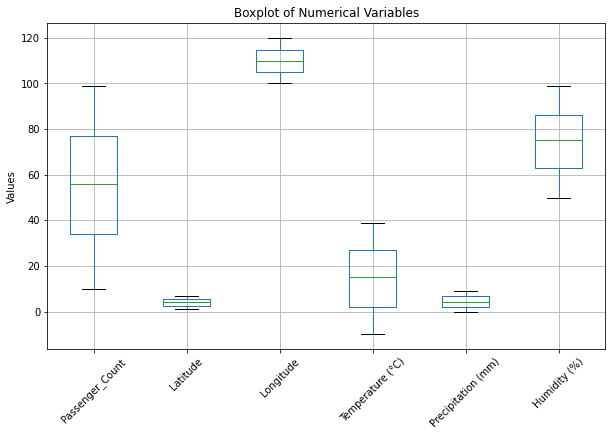

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Outlier Treatment: For demonstration, let's replace outliers with NaNs

In [25]:
df_outliers_removed = df.mask((df - df.mean()).abs() > 3 * df.std())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


# Display cleaned DataFrame

In [26]:
print("\nDataFrame after outlier removal:")
df_outliers_removed.head()


DataFrame after outlier removal:


,Date,Time,Stop/Station,Passenger_Count,Vehicle_ID,Latitude,Longitude,Temperature (°C),Precipitation (mm),Humidity (%),Age_Group,Gender,Feedback
0,2023-11-16,12:03,Johor Bahru,46,TRAIN82,3.906935,106.068464,11,3,63,18-24,Male,Driver was friendly
1,2023-07-14,05:07,Cameron Highlands,17,TRAIN65,4.227106,118.407191,3,3,74,25-40,Female,Seats were uncomfortable
2,2023-09-22,14:11,Ipoh,91,TRAIN38,6.819556,101.272984,27,1,81,40-60,Male,Delay in departure
3,2022-07-12,09:11,Penang,41,BUS245,3.627521,106.226990,1,7,98,25-40,Female,Driver was friendly
4,2023-12-09,16:59,Kuching,53,BUS958,1.418952,117.050925,15,9,71,40-60,Male,Service was excellent
